In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
xcme = []
xflare = []
xtime = []

for i in range(2011, 2025):
    baseurl = "https://kauai.ccmc.gsfc.nasa.gov/DONKI/WS/get/FLR?"
    t_start = f"{i}-01-01"
    t_end = f"{i}-12-31"
    url = f"{baseurl}startDate={t_start}&endDate={t_end}"
    
    df = pd.read_json(url)
    xtime.append(i)

    Xflare = df[df['classType'].str.contains("X", na=False)]
    xflare.append(Xflare.shape[0])

    Xfcme = Xflare[~Xflare['linkedEvents'].isnull()]
    Xfcme = Xfcme[Xfcme['linkedEvents'].apply(lambda x: any("CME" in ev['activityID'] for ev in x))]
    xcme.append(Xfcme.shape[0])

In [3]:
percent=[]
for i in range(len(xflare)):
    if xflare[i]!=0:
        percent.append(xcme[i]/xflare[i]*100)
    else:
        percent.append(np.nan)


Xdf = pd.DataFrame({"Year": xtime, "Flare_CME": xcme, "Flare": xflare,"Percent":percent})

Xdf

,Year,Flare_CME,Flare,Percent
0,2011,4,8,50.000000
1,2012,6,7,85.714286
2,2013,11,12,91.666667
3,2014,9,16,56.250000
4,2015,2,2,100.000000
5,2016,0,0,NaN
6,2017,3,4,75.000000
7,2018,0,0,NaN
8,2019,0,0,NaN
9,2020,0,0,NaN


In [4]:
mcme = []
mflare = []
mtime = []

for i in range(2011, 2025):
    baseurl = "https://kauai.ccmc.gsfc.nasa.gov/DONKI/WS/get/FLR?"
    t_start = f"{i}-01-01"
    t_end = f"{i}-12-31"
    url = f"{baseurl}startDate={t_start}&endDate={t_end}"
    
    df = pd.read_json(url)
    mtime.append(i)

    Mflare = df[df['classType'].str.contains("M", na=False)]
    mflare.append(Mflare.shape[0])

    Mfcme = Mflare[~Mflare['linkedEvents'].isnull()]
    Mfcme = Mfcme[Mfcme['linkedEvents'].apply(lambda x: any("CME" in ev['activityID'] for ev in x))]
    mcme.append(Mfcme.shape[0])

In [5]:
mpercent=[]
for i in range(len(mflare)):
    if mflare[i]!=0:
        mpercent.append(mcme[i]/mflare[i]*100)
    else:
        mpercent.append(np.nan)


Mdf = pd.DataFrame({"Year": mtime, "Flare_CME": mcme, "Flare": mflare,"Percent":mpercent})

Mdf

,Year,Flare_CME,Flare,Percent
0,2011,7,22,31.818182
1,2012,14,23,60.869565
2,2013,8,16,50.000000
3,2014,44,199,22.110553
4,2015,27,125,21.600000
5,2016,4,16,25.000000
6,2017,14,39,35.897436
7,2018,0,0,NaN
8,2019,0,0,NaN
9,2020,1,2,50.000000


In [6]:
mxcme = []
mxflare = []
mxtime = []

for i in range(2011, 2025):
    baseurl = "https://kauai.ccmc.gsfc.nasa.gov/DONKI/WS/get/FLR?"
    t_start = f"{i}-01-01"
    t_end = f"{i}-12-31"
    url = f"{baseurl}startDate={t_start}&endDate={t_end}"
    
    df = pd.read_json(url)
    mxtime.append(i)

    MXflare = df[df['classType'].str.contains("M|X", na=False)]
    mxflare.append(MXflare.shape[0])

    MXfcme = MXflare[~MXflare['linkedEvents'].isnull()]
    MXfcme = MXfcme[MXfcme['linkedEvents'].apply(lambda x: any("CME" in ev['activityID'] for ev in x))]
    mxcme.append(MXfcme.shape[0])


In [7]:
mxpercent=[]
for i in range(len(mflare)):
    if mflare[i]!=0:
        mxpercent.append(mxcme[i]/mxflare[i]*100)
    else:
        mxpercent.append(np.nan)


MXdf = pd.DataFrame({"Year": mxtime, "Flare_CME": mxcme, "Flare": mxflare,"Percent":mxpercent})

MXdf

,Year,Flare_CME,Flare,Percent
0,2011,11,30,36.666667
1,2012,20,30,66.666667
2,2013,19,28,67.857143
3,2014,53,215,24.651163
4,2015,29,127,22.834646
5,2016,4,16,25.000000
6,2017,17,43,39.534884
7,2018,0,0,NaN
8,2019,0,0,NaN
9,2020,1,2,50.000000


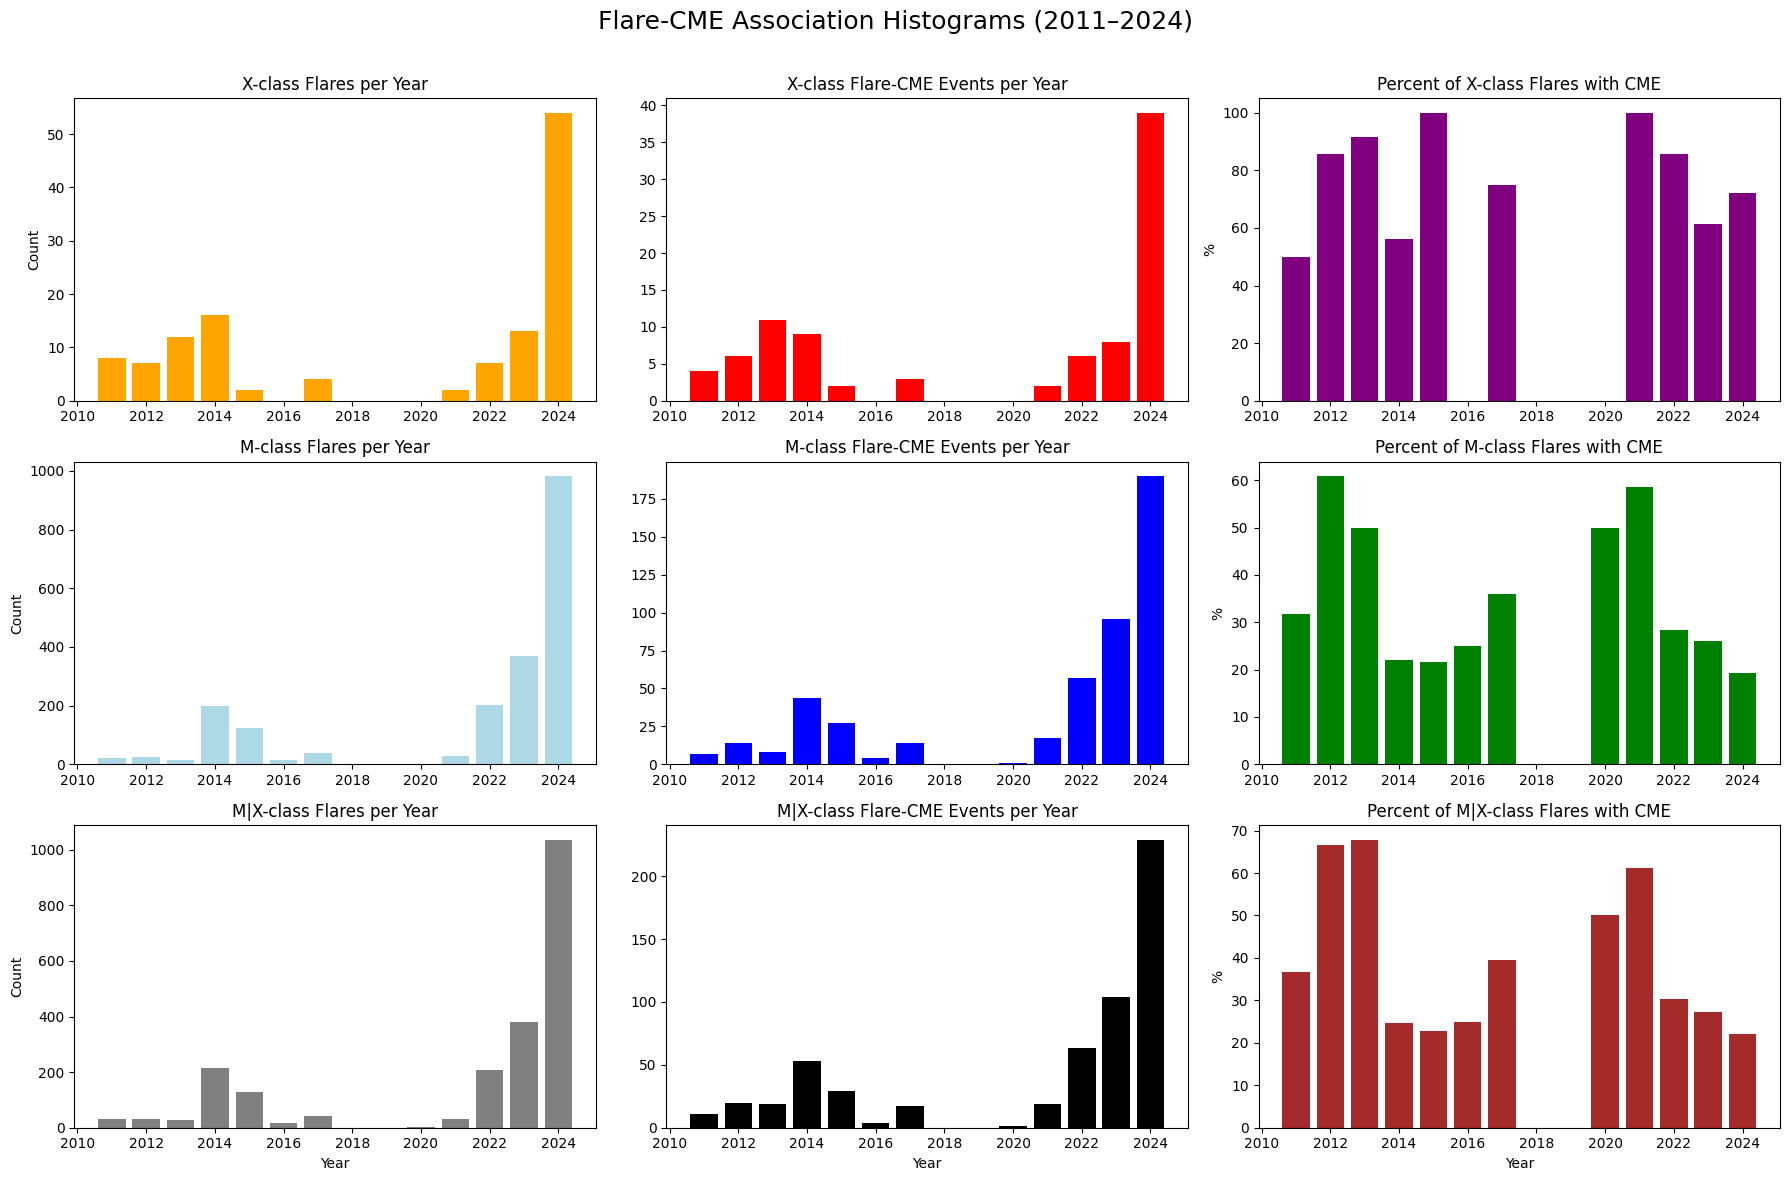

In [9]:
import matplotlib.pyplot as plt

# Set the figure style
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Flare-CME Association Histograms (2011–2024)', fontsize=18)

# ------------- X-Class Flares -------------
axs[0, 0].bar(Xdf["Year"], Xdf["Flare"], color='orange')
axs[0, 0].set_title("X-class Flares per Year")
axs[0, 0].set_ylabel("Count")

axs[0, 1].bar(Xdf["Year"], Xdf["Flare_CME"], color='red')
axs[0, 1].set_title("X-class Flare-CME Events per Year")

axs[0, 2].bar(Xdf["Year"], Xdf["Percent"], color='purple')
axs[0, 2].set_title("Percent of X-class Flares with CME")
axs[0, 2].set_ylabel("%")

# ------------- M-Class Flares -------------
axs[1, 0].bar(Mdf["Year"], Mdf["Flare"], color='lightblue')
axs[1, 0].set_title("M-class Flares per Year")
axs[1, 0].set_ylabel("Count")

axs[1, 1].bar(Mdf["Year"], Mdf["Flare_CME"], color='blue')
axs[1, 1].set_title("M-class Flare-CME Events per Year")

axs[1, 2].bar(Mdf["Year"], Mdf["Percent"], color='green')
axs[1, 2].set_title("Percent of M-class Flares with CME")
axs[1, 2].set_ylabel("%")

# ------------- M|X-Class Flares Combined -------------
axs[2, 0].bar(MXdf["Year"], MXdf["Flare"], color='gray')
axs[2, 0].set_title("M|X-class Flares per Year")
axs[2, 0].set_xlabel("Year")
axs[2, 0].set_ylabel("Count")

axs[2, 1].bar(MXdf["Year"], MXdf["Flare_CME"], color='black')
axs[2, 1].set_title("M|X-class Flare-CME Events per Year")
axs[2, 1].set_xlabel("Year")

axs[2, 2].bar(MXdf["Year"], MXdf["Percent"], color='brown')
axs[2, 2].set_title("Percent of M|X-class Flares with CME")
axs[2, 2].set_ylabel("%")
axs[2, 2].set_xlabel("Year")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
